In [2]:
!nvidia-smi

Sun Jun  1 14:15:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P0             25W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
%%capture
import os
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    # Do this only in Colab notebooks! Otherwise use pip install unsloth
    !pip install --no-deps bitsandbytes accelerate xformers==0.0.29.post3 peft trl==0.15.2 triton cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf "datasets>=3.4.1" huggingface_hub hf_transfer
    !pip install --no-deps unsloth

In [18]:
# Thêm cell này sau cell import đầu tiên
!pip install evaluate
!pip install nltk
import evaluate
import nltk
nltk.download('wordnet')
nltk.download('punkt')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.4 MB/s eta 0:00:00


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
!pip install kagglehub

In [6]:
!pip install transformers peft datasets torch accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-

In [27]:
from unsloth import FastLanguageModel
import torch

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/llama-3-8b-Instruct-bnb-4bit",
    max_seq_length = 2048,
    dtype = None,
    load_in_4bit = True,
)

# RSLoRA - Ổn định hơn với rank cao
model = FastLanguageModel.get_peft_model(
    model,
    r = 32, # Có thể dùng rank cao hơn với RSLoRA
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj"],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",
    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
    use_rslora = True,  # Bật Rank-Stabilized LoRA
)

==((====))==  Unsloth 2025.5.9: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    Tesla P100-PCIE-16GB. Num GPUs = 1. Max memory: 15.888 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 6.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [10]:
import kagglehub
path = kagglehub.dataset_download("tuannguyenvananh/iwslt15-englishvietnamese")

In [15]:
from unsloth.chat_templates import get_chat_template
from datasets import Dataset
import pandas as pd

tokenizer = get_chat_template(
    tokenizer,
    chat_template = "llama-3", 
    mapping = {"role" : "from", "content" : "value", "user" : "human", "assistant" : "gpt"},
)

# Load IWSLT'15 En-Vi dataset từ local files
def load_iwslt15_dataset(base_path="/kaggle/input/iwslt15-englishvietnamese"):
    """Load IWSLT'15 English-Vietnamese dataset từ thư mục con"""
    import os
    
    # Đường dẫn đến thư mục con chứa dataset thực tế
    data_dir = os.path.join(base_path, "IWSLT'15 en-vi")
    
    # Đường dẫn đến các file dataset
    train_en_file = os.path.join(data_dir, "train.en.txt")
    train_vi_file = os.path.join(data_dir, "train.vi.txt")
    
    print(f"Looking for files in: {data_dir}")
    print(f"EN file: {train_en_file}")
    print(f"VI file: {train_vi_file}")
    
    # Kiểm tra file tồn tại
    if not os.path.exists(train_en_file) or not os.path.exists(train_vi_file):
        raise FileNotFoundError(f"Không tìm thấy file: {train_en_file} hoặc {train_vi_file}")
    
    # Đọc file
    with open(train_en_file, 'r', encoding='utf-8') as f:
        en_texts = [line.strip() for line in f.readlines()]
    
    with open(train_vi_file, 'r', encoding='utf-8') as f:
        vi_texts = [line.strip() for line in f.readlines()]
    
    # Kiểm tra số dòng khớp
    if len(en_texts) != len(vi_texts):
        raise ValueError(f"Số dòng không khớp: EN={len(en_texts)}, VI={len(vi_texts)}")
    
    print(f"✅ Loaded {len(en_texts):,} sentence pairs")
    
    # Tạo dataset format giống WMT14
    data = []
    for en, vi in zip(en_texts, vi_texts):
        data.append({
            'translation': {
                'en': en,
                'vi': vi
            }
        })
    
    return Dataset.from_list(data)

# Load dataset từ path đúng (bao gồm thư mục con)
iwslt15_dataset = load_iwslt15_dataset("/kaggle/input/iwslt15-englishvietnamese")

def format_iwslt15_for_chat(examples):
    texts = []
    for translation_pair in examples['translation']:
        en_text = translation_pair['en']
        vi_text = translation_pair['vi']  # Thay đổi từ 'fr' thành 'vi'
        
        conversation = [
            {"from": "human", "value": f"Translate this English text to Vietnamese: {en_text}"},  # Thay đổi từ French thành Vietnamese
            {"from": "gpt", "value": vi_text}
        ]
        
        text = tokenizer.apply_chat_template(conversation, tokenize=False, add_generation_prompt=False)
        texts.append(text)
    
    return {"text": texts}

total_size = len(iwslt15_dataset)
sample_size = int(0.01 * total_size)  
subset_dataset = iwslt15_dataset.select(range(sample_size))

formatted_dataset = subset_dataset.map(format_iwslt15_for_chat, batched=True)

print("Sample đã được format:")
print(formatted_dataset[0]['text'])
print("\n" + "="*50 + "\n")
print(formatted_dataset[1]['text'])

train_size = int(0.9 * len(formatted_dataset))
train_dataset = formatted_dataset.select(range(train_size))
val_dataset = formatted_dataset.select(range(train_size, len(formatted_dataset)))

print(f"\nTotal original dataset size: {total_size}")
print(f"Using 1% subset size: {sample_size}")
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

Looking for files in: /kaggle/input/iwslt15-englishvietnamese/IWSLT'15 en-vi
EN file: /kaggle/input/iwslt15-englishvietnamese/IWSLT'15 en-vi/train.en.txt
VI file: /kaggle/input/iwslt15-englishvietnamese/IWSLT'15 en-vi/train.vi.txt
✅ Loaded 133,317 sentence pairs


Map:   0%|          | 0/1333 [00:00<?, ? examples/s]

Sample đã được format:
<|begin_of_text|><|start_header_id|>user<|end_header_id|>

Translate this English text to Vietnamese: Rachel Pike : The science behind a climate headline<|eot_id|><|start_header_id|>assistant<|end_header_id|>

Khoa học đằng sau một tiêu đề về khí hậu<|eot_id|>


<|begin_of_text|><|start_header_id|>user<|end_header_id|>

Translate this English text to Vietnamese: In 4 minutes , atmospheric chemist Rachel Pike provides a glimpse of the massive scientific effort behind the bold headlines on climate change , with her team -- one of thousands who contributed -- taking a risky flight over the rainforest in pursuit of data on a key molecule .<|eot_id|><|start_header_id|>assistant<|end_header_id|>

Trong 4 phút , chuyên gia hoá học khí quyển Rachel Pike giới thiệu sơ lược về những nỗ lực khoa học miệt mài đằng sau những tiêu đề táo bạo về biến đổi khí hậu , cùng với đoàn nghiên cứu của mình -- hàng ngàn người đã cống hiến cho dự án này -- một chuyến bay mạo hiểm qua rừng

In [28]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported
import os

os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "disabled"
max_seq_length = 2048
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = train_dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False,
    args = TrainingArguments(
        per_device_train_batch_size = 4,
        warmup_steps = 2,
        max_steps = 100,  # Cố định số steps
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 5,  # Log mỗi 5 steps
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = [], 
    ),
)

print("Trainer được setup thành công!")
print(f"Sẽ training {50} steps với batch size {4}")

Unsloth: Tokenizing ["text"]:   0%|          | 0/1199 [00:00<?, ? examples/s]

Trainer được setup thành công!
Sẽ training 50 steps với batch size 4


In [29]:
print("=== BẮT ĐẦU TRAINING ===")
print(f"Dataset size: {len(train_dataset)}")
print(f"Batch size: 4")
print(f"Total steps: 50")
print("=" * 50)

trainer_stats = trainer.train()

print("\n=== TRAINING HOÀN THÀNH ===")
print(f"Training loss: {trainer_stats.training_loss:.4f}")
print(f"Total training time: {trainer_stats.metrics.get('train_runtime', 'N/A')} seconds")

=== BẮT ĐẦU TRAINING ===
Dataset size: 1199
Batch size: 4
Total steps: 50


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 1,199 | Num Epochs = 1 | Total steps = 100
O^O/ \_/ \    Batch size per device = 4 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (4 x 1 x 1) = 4
 "-____-"     Trainable parameters = 83,886,080/8,000,000,000 (1.05% trained)


Step,Training Loss
5,3.469900
10,2.036600
15,1.767500
20,1.800100
25,1.603900
30,1.634400
35,1.537900
40,1.623400
45,1.890500
50,1.709600



=== TRAINING HOÀN THÀNH ===
Training loss: 1.7042
Total training time: 356.5992 seconds


In [34]:
# Thêm cell này để chuẩn bị test set và evaluate function
import random
from datasets import load_dataset

# Load METEOR metric
meteor = evaluate.load('meteor')

def evaluate_translation(model, tokenizer, test_sentences, references):
    """
    Evaluate model trên test set và tính METEOR score
    """
    predictions = []
    
    for sentence in test_sentences:
        messages = [
            {"role": "user", "content": f"Translate this English text to Vietnamese: {sentence}"}
        ]
        
        inputs = tokenizer.apply_chat_template(
            messages,
            tokenize = True,
            add_generation_prompt = True,
            return_tensors = "pt"
        ).to("cuda")
        
        outputs = model.generate(
            input_ids = inputs, 
            max_new_tokens = 50,  
            use_cache = True,
            temperature = 0.1,
            do_sample = True
        )
        
        response = tokenizer.decode(outputs[0][inputs.shape[1]:], skip_special_tokens=True)
        predictions.append(response.strip())
    
    # Tính METEOR score
    meteor_score = meteor.compute(predictions=predictions, references=references)
    
    return predictions, meteor_score

# Tạo test set từ validation dataset
test_size = 10  # Dùng 100 samples để test
test_indices = random.sample(range(len(val_dataset)), test_size)

test_sentences = []
test_references = []

for idx in test_indices:
    # Extract từ formatted text
    text = val_dataset[idx]['text']
    # Parse để lấy English và French text
    lines = text.split('\n')
    for line in lines:
        if 'Translate this English text to Vietnamese:' in line:
            english_text = line.split('Translate this English text to Vietnamese: ')[1].replace('<|eot_id|>', '').strip()
            test_sentences.append(english_text)
            break
    
    for line in lines:
        if '<|start_header_id|>assistant<|end_header_id|>' in line:
            # Tìm Vietnamese translation ở dòng tiếp theo
            next_idx = lines.index(line) + 2
            if next_idx < len(lines):
                french_text = lines[next_idx].replace('<|eot_id|>', '').strip()
                test_references.append(french_text)
                break

print(f"Prepared {len(test_sentences)} test sentences")
print(f"Sample English: {test_sentences[0]}")
print(f"Sample Vietnamese reference: {test_references[0]}")

Prepared 10 test sentences
Sample English: I believe we already live in Sitopia .<|start_header_id|>assistant<|end_header_id|>
Sample Vietnamese reference: Tôi tin rằng ta đang sống ở Sitopia rồi .


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [35]:
# Thêm cell này TRƯỚC khi training để evaluate mô hình chưa fine-tune
print("=== EVALUATION TRƯỚC KHI FINE-TUNE ===")

# Set model to inference mode
FastLanguageModel.for_inference(model)

# Evaluate trước khi fine-tune
predictions_before, meteor_before = evaluate_translation(model, tokenizer, test_sentences, test_references)

print(f"METEOR Score before fine-tuning: {meteor_before['meteor']:.4f}")
print("\nSample predictions before fine-tuning:")
for i in range(3):
    print(f"English: {test_sentences[i]}")
    print(f"Reference: {test_references[i]}")
    print(f"Prediction: {predictions_before[i]}")
    print("-" * 50)

=== EVALUATION TRƯỚC KHI FINE-TUNE ===
METEOR Score before fine-tuning: 0.5305

Sample predictions before fine-tuning:
English: I believe we already live in Sitopia .<|start_header_id|>assistant<|end_header_id|>
Reference: Tôi tin rằng ta đang sống ở Sitopia rồi .
Prediction: Tôi tin rằng chúng ta đã sống trong Sitopia.
--------------------------------------------------
English: Now it &apos;s anonymous .<|start_header_id|>assistant<|end_header_id|>
Reference: Giờ thì khác .
Prediction: Bây giờ nó là ẩn danh.
--------------------------------------------------
English: And the same of course was true for fish .<|start_header_id|>assistant<|end_header_id|>
Reference: Và cũng tương tự với cá .
Prediction: Và điều tương tự cũng đúng cho cá.
--------------------------------------------------


In [36]:
# Thay thế cell test cuối bằng cell evaluation đầy đủ này
print("=== EVALUATION SAU KHI FINE-TUNE ===")

# Set model to inference mode
FastLanguageModel.for_inference(model)

# Evaluate sau khi fine-tune
predictions_after, meteor_after = evaluate_translation(model, tokenizer, test_sentences, test_references)

print(f"METEOR Score after fine-tuning: {meteor_after['meteor']:.4f}")
print(f"METEOR Score before fine-tuning: {meteor_before['meteor']:.4f}")
print(f"Improvement: {meteor_after['meteor'] - meteor_before['meteor']:.4f}")

print("\nSample predictions after fine-tuning:")
for i in range(3):
    print(f"English: {test_sentences[i]}")
    print(f"Reference: {test_references[i]}")
    print(f"Before: {predictions_before[i]}")
    print(f"After: {predictions_after[i]}")
    print("-" * 50)

# Tính thống kê chi tiết
improvement_count = 0
for i in range(len(test_sentences)):
    meteor_before_single = meteor.compute(predictions=[predictions_before[i]], references=[test_references[i]])
    meteor_after_single = meteor.compute(predictions=[predictions_after[i]], references=[test_references[i]])
    
    if meteor_after_single['meteor'] > meteor_before_single['meteor']:
        improvement_count += 1

print(f"\nThống kê cải thiện:")
print(f"Số câu được cải thiện: {improvement_count}/{len(test_sentences)} ({improvement_count/len(test_sentences)*100:.1f}%)")

=== EVALUATION SAU KHI FINE-TUNE ===
METEOR Score after fine-tuning: 0.5182
METEOR Score before fine-tuning: 0.5305
Improvement: -0.0123

Sample predictions after fine-tuning:
English: I believe we already live in Sitopia .<|start_header_id|>assistant<|end_header_id|>
Reference: Tôi tin rằng ta đang sống ở Sitopia rồi .
Before: Tôi tin rằng chúng ta đã sống trong Sitopia.
After: Tôi tin rằng chúng ta đã sống trong Sitopia.
--------------------------------------------------
English: Now it &apos;s anonymous .<|start_header_id|>assistant<|end_header_id|>
Reference: Giờ thì khác .
Before: Bây giờ nó là ẩn danh.
After: Bây giờ nó là ẩn danh.
--------------------------------------------------
English: And the same of course was true for fish .<|start_header_id|>assistant<|end_header_id|>
Reference: Và cũng tương tự với cá .
Before: Và điều tương tự cũng đúng cho cá.
After: Và điều tương tự cũng đúng cho cá.
--------------------------------------------------

Thống kê cải thiện:
Số câu được 

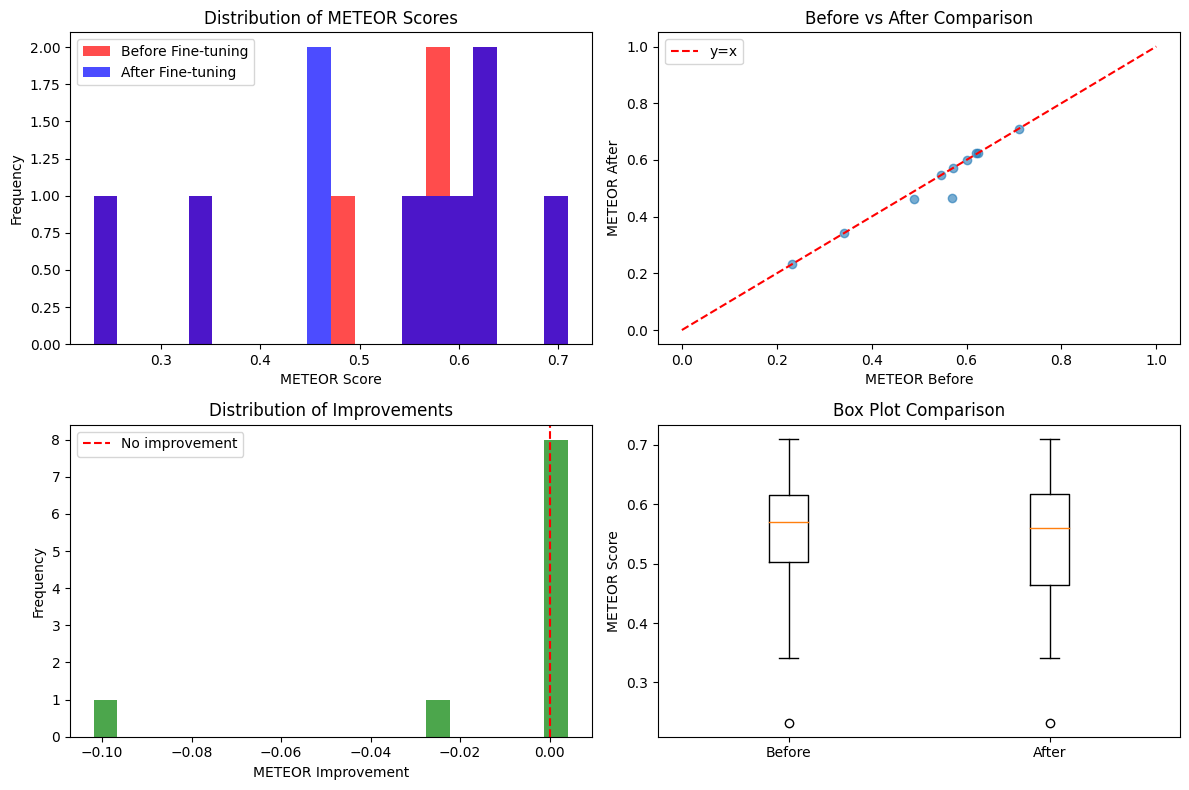

Average METEOR before: 0.5305 ± 0.1355
Average METEOR after: 0.5182 ± 0.1372
Average improvement: -0.0123 ± 0.0308


In [37]:
# Thêm cell này để so sánh chi tiết
import matplotlib.pyplot as plt
import numpy as np

# Tính METEOR score cho từng câu
scores_before = []
scores_after = []

for i in range(len(test_sentences)):
    score_before = meteor.compute(predictions=[predictions_before[i]], references=[test_references[i]])
    score_after = meteor.compute(predictions=[predictions_after[i]], references=[test_references[i]])
    
    scores_before.append(score_before['meteor'])
    scores_after.append(score_after['meteor'])

# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(scores_before, bins=20, alpha=0.7, label='Before Fine-tuning', color='red')
plt.hist(scores_after, bins=20, alpha=0.7, label='After Fine-tuning', color='blue')
plt.xlabel('METEOR Score')
plt.ylabel('Frequency')
plt.title('Distribution of METEOR Scores')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(scores_before, scores_after, alpha=0.6)
plt.plot([0, 1], [0, 1], 'r--', label='y=x')
plt.xlabel('METEOR Before')
plt.ylabel('METEOR After')
plt.title('Before vs After Comparison')
plt.legend()

plt.subplot(2, 2, 3)
improvements = np.array(scores_after) - np.array(scores_before)
plt.hist(improvements, bins=20, alpha=0.7, color='green')
plt.xlabel('METEOR Improvement')
plt.ylabel('Frequency')
plt.title('Distribution of Improvements')
plt.axvline(x=0, color='red', linestyle='--', label='No improvement')
plt.legend()

plt.subplot(2, 2, 4)
plt.boxplot([scores_before, scores_after], labels=['Before', 'After'])
plt.ylabel('METEOR Score')
plt.title('Box Plot Comparison')

plt.tight_layout()
plt.show()

print(f"Average METEOR before: {np.mean(scores_before):.4f} ± {np.std(scores_before):.4f}")
print(f"Average METEOR after: {np.mean(scores_after):.4f} ± {np.std(scores_after):.4f}")
print(f"Average improvement: {np.mean(improvements):.4f} ± {np.std(improvements):.4f}")

In [3]:
!nvidia-smi

Wed May 28 06:29:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----